# IPL 2022 Cricket Sports Data Analysis

## Introduction:
IPL is a professional Twenty20 cricket league, launched by BCCI in 2008, has 10 teams with brand value in 2022 of $11B.
Let's analyze it statistically.y.

# Objectives:-

1. **Data Exploration**: Explore and understand the dataset.
    
2. **Performance Evaluation**: Evaluate IPL 2022 team and player performance.

3. **Team Insights**: Analyze team success and toss outcomes.

4. **Venue Significance**: Determine key venues in the tournament.

5. **Match Outcomes**: Examine distribution of match results.

6. **Winning Margins**: Analyze winning margins in defending wins.

7. **Toss Analysis**: Investigate toss impact on match results.

8. **Player Analysis**: Assess top players' contributions.

09. **Player Awards**: Identify standout performers.

10. **Cricketing Insights**: Provide insights for cricket enthusiasts.

# Data Preparation and Cleaning

In [30]:
#Installing Liabraries to be used
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install plotly

In [80]:
#import liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [81]:
df=pd.read_csv("Book_ipl22_ver_33.csv")   #importing data set to notebook

In [82]:
df.head() #top 5 entries

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


**Observation** :
    
- output displays the first five rows of an IPL match dataset with information about teams, venues, match outcomes, and notable performances. 
    
- It provides a snapshot of the data's structure and content for initial inspection.

In [83]:
df.shape  # dimensions of the data set

(74, 20)

In [84]:
df.columns #Columns of the dataset

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_winner', 'won_by',
       'margin', 'player_of_the_match', 'top_scorer', 'highscore',
       'best_bowling', 'best_bowling_figure'],
      dtype='object')

**Observation** :
- The columns describe IPL match details, including teams, venues, toss information, scores, winners, and player achievements.

In [85]:
df.describe() #stastical terms of the data

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,margin,highscore
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,37.500000,171.121622,6.135135,158.540541,6.175676,16.972973,71.716216
std,21.505813,29.048355,2.222699,29.299207,2.639832,19.651047,20.705052
min,1.000000,68.000000,0.000000,72.000000,1.000000,2.000000,28.000000
25%,19.250000,154.250000,5.000000,142.750000,4.000000,5.250000,57.000000
50%,37.500000,169.500000,6.000000,160.000000,6.000000,8.000000,68.000000
75%,55.750000,192.750000,8.000000,176.000000,8.000000,18.000000,87.750000
max,74.000000,222.000000,10.000000,211.000000,10.000000,91.000000,140.000000


In [86]:
df.info() #checking for data information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

**Observation** :
- Non-null counts confirm no missing data.


In [87]:
df.isnull().sum()  #Checking for null values

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

### Data Cleaning

In [88]:
df['best_bowling_figure']=df['best_bowling_figure'].str[0]  #Extracting wickets only for analysis

In [89]:
df['best_bowling_figure']=df['best_bowling_figure'].astype(int)  # converting datatype str to int

# Exploratory Analysis and Visualization

## 1.PERFORMANCE EVALUATION

#### TOTAL MATCHES PLAYED BY EACH TEAM

In [90]:
df["team1"].value_counts() + df["team2"].value_counts()  #Total Mathes played by each team

Banglore      NaN
Chennai      14.0
Delhi        14.0
Gujarat      16.0
Hyderabad    14.0
Kolkata      14.0
Lucknow      15.0
Mumbai       14.0
Punjab       14.0
Rajasthan     NaN
Name: count, dtype: float64

**Observation** :

- Rajasthan and Banglore has NaN value. This means they either played all their matches as 'team1' or 'team2', but not both.
- The numeric values represent the total number of times each team appeared as either 'team1' or 'team2' in the dataset, indicating their overall participation in IPL matches during the 2022 season.

**Handling NAN values**

In [91]:
total_matches=df['team1'].value_counts().add(df['team2'].value_counts(), fill_value=0).astype(int) #NA values treated as a 0 for arithmetic addition
total_matches

Banglore     16
Chennai      14
Delhi        14
Gujarat      16
Hyderabad    14
Kolkata      14
Lucknow      15
Mumbai       14
Punjab       14
Rajasthan    17
Name: count, dtype: int32

In [92]:
#total_matches_played = pd.DataFrame(df['team1'].value_counts().add(df['team2'].value_counts(), fill_value=0).astype(int)) #convert nan to 0 for addition operation
#total_matches_played.index.name = 'Team_Name'
#total_matches_played 

**Code Explain** :-

- add() used to add the 'values' of two Series.

- fill_value=0 used to specify that if a team is missing in one of the Series (resulting in a NaN value), it should be treated as 0 during addition

- astype(int) : convert result float to integer

#### COUNT OF STAGES MATCHES

In [93]:
df["stage"].value_counts() #Distribution of total matches

stage
Group      70
Playoff     3
Final       1
Name: count, dtype: int64

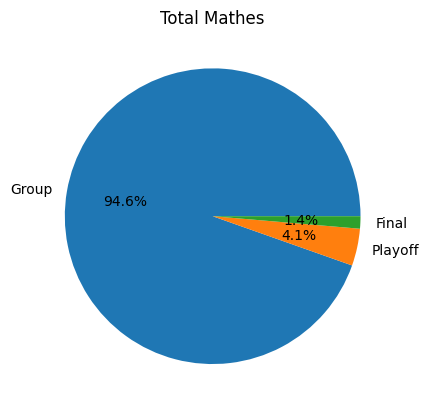

In [94]:
# Declaring data

# data
data = [70,3,1]

# Keys of data
keys = ["Group","Playoff","Final"]

# Plotting data on chart
plt.pie(data, labels=keys, autopct='%1.1f%%')

# Add title to the chart
plt.title('Total Mathes')

# Displaying chart
plt.show() 

In [95]:
#seperate out list of numeric features 
numeric_features = df.describe().columns
numeric_features=list(numeric_features)
numeric_features

['match_id',
 'first_ings_score',
 'first_ings_wkts',
 'second_ings_score',
 'second_ings_wkts',
 'margin',
 'highscore',
 'best_bowling_figure']

C:\Users\naren\AppData\Local\Temp\ipykernel_16372\2046159111.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\naren\AppData\Local\Temp\ipykernel_16372\2046159111.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\naren\AppData\Local\Temp\ipykernel_16372\2046159111.py:5: UserWarning:



`distplot` is

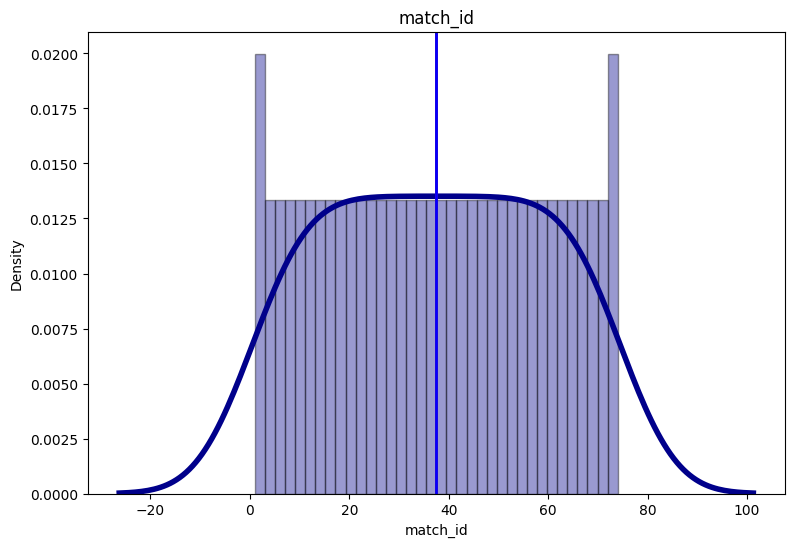

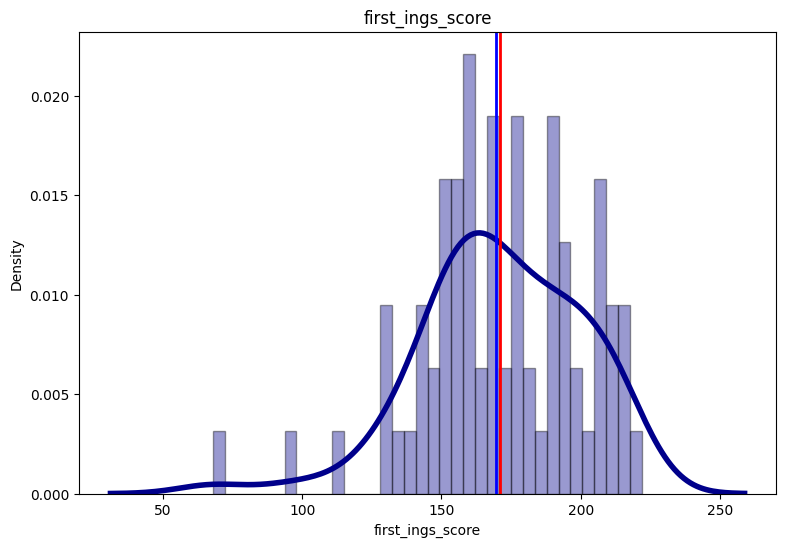

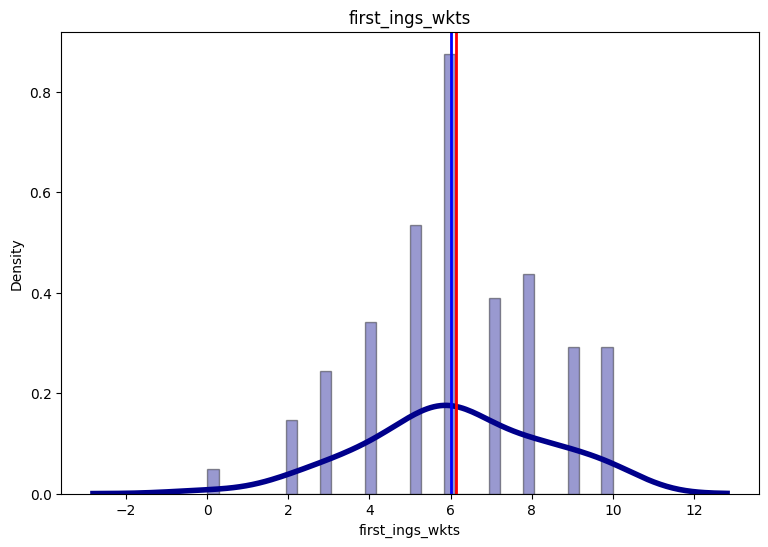

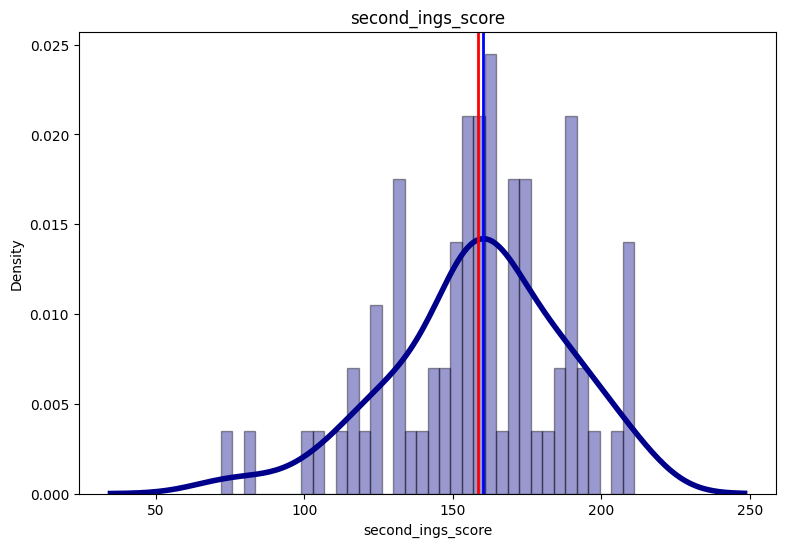

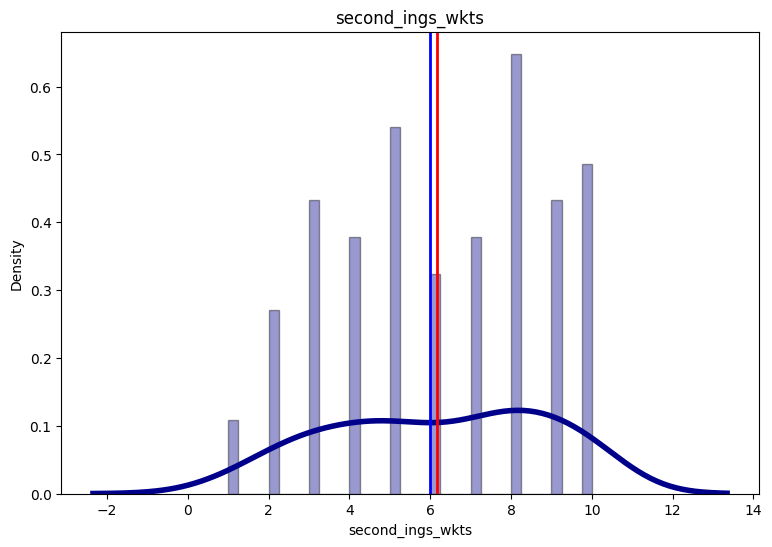

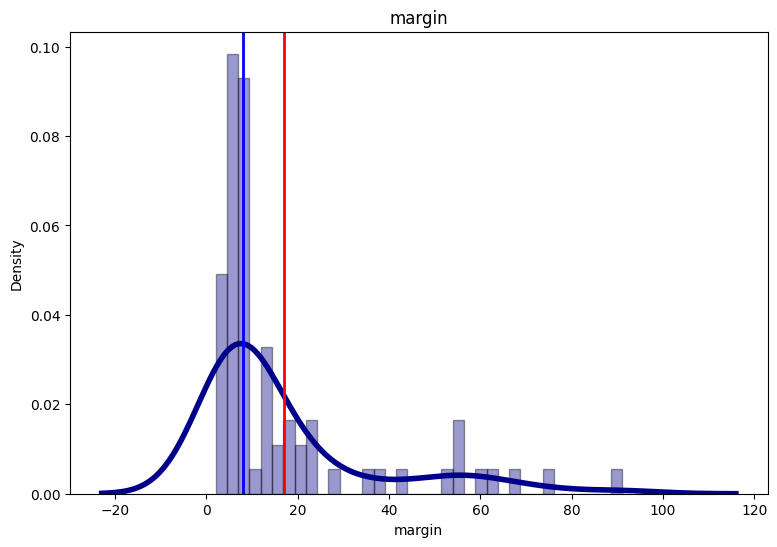

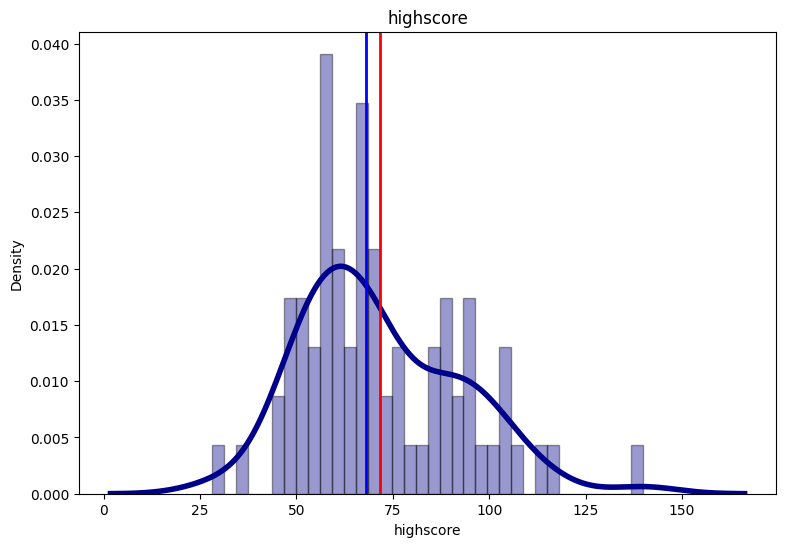

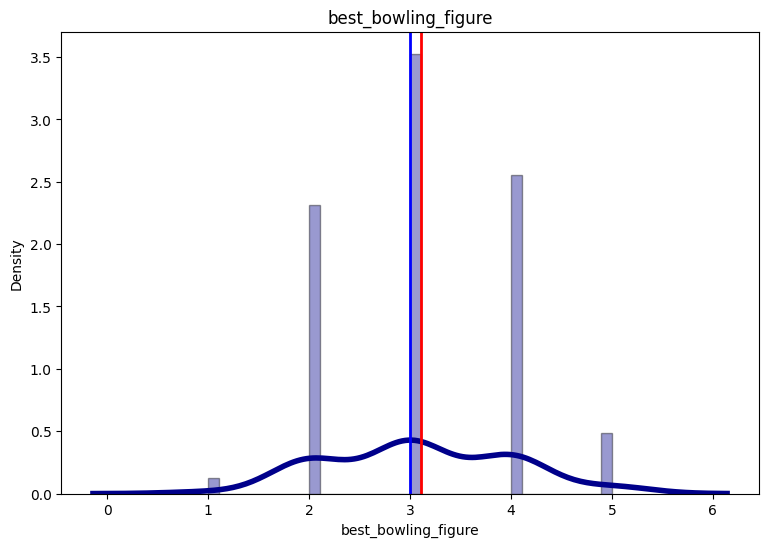

In [96]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
    ax.axvline(feature.mean(), color='r', linewidth=2)
    ax.axvline(feature.median(), color='b', linewidth=2)    
    ax.set_title(col)
plt.show()

### TEAM INSIGHTS

#### MOST TOSS WINNING TEAMS

In [97]:
# Count the number of toss wins by each IPL team
toss_winning_teams=df['toss_winner'].value_counts()
toss_winning_teams

toss_winner
Gujarat      10
Hyderabad    10
Mumbai        9
Kolkata       8
Delhi         8
Banglore      8
Lucknow       7
Chennai       6
Punjab        4
Rajasthan     4
Name: count, dtype: int64

**Observation** 
- Teams' success in winning the coin toss:
- 'Gujarat' and 'Hyderabad' were the most successful in winning the toss, each winning it 10 times.

### Plotting in bar graph

C:\Users\naren\AppData\Local\Temp\ipykernel_16372\4108376533.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='toss_winner', ylabel='count'>

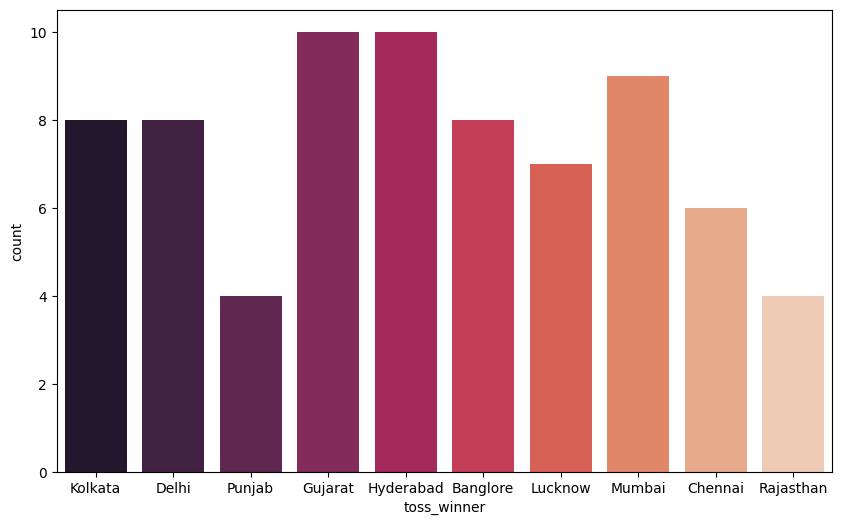

In [98]:
plt.figure(figsize=(10, 6))  #plotting countplot using seaborn 
sns.countplot(x="toss_winner", data=df,palette="rocket")

## Percentage of Team winning the Toss also Winning the Match

In [99]:
# Find out how many times a team has won the match after winning the Toss

toss_match_won = df[df['toss_winner'] == df['match_winner']]['match_winner'].value_counts()
toss_match_won

match_winner
Gujarat      7
Kolkata      5
Hyderabad    5
Delhi        4
Banglore     4
Lucknow      4
Mumbai       3
Rajasthan    2
Punjab       1
Chennai      1
Name: count, dtype: int64

In [100]:
# Calculate the percentage of matches won when the team wins both the toss and the match
percentage_won = (toss_match_won / toss_winning_teams * 100).astype(int).sort_values(ascending=False)
percentage_won

Gujarat      70
Kolkata      62
Lucknow      57
Banglore     50
Delhi        50
Hyderabad    50
Rajasthan    50
Mumbai       33
Punjab       25
Chennai      16
Name: count, dtype: int32

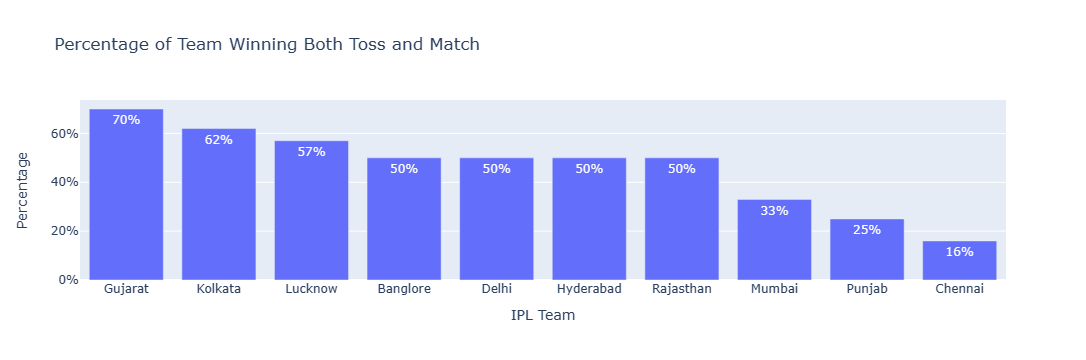

In [101]:
# Plotting with Bar Chart

px.bar(
    percentage_won, x=percentage_won.index, y=percentage_won,
    text_auto=True,
    title='Percentage of Team Winning Both Toss and Match',
    labels={'index': 'IPL Team', 'y': 'Percentage'}
).update_layout(yaxis_ticksuffix='%')

### Percentage of toss winning team won match

In [102]:
effect_of_toss=(toss_match_won.sum()/74)*100 #Percentage of toss winning team won match

In [103]:
effect_of_toss

48.64864864864865

### Toss Winning Team Chooses to do bat or Field

In [104]:
toss_winning_decision=pd.DataFrame(df["toss_decision"].value_counts()) # dataframe of toss winning teams decisions

In [105]:
toss_winning_decision

,count
toss_decision,
Field,59
Bat,15


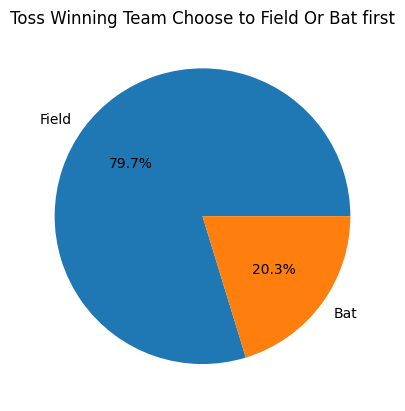

In [106]:
# Declaring data

# data
data = [59,15]

# Keys of data
keys = ["Field","Bat"]

# Plotting data on chart
plt.pie(data, labels=keys,autopct='%1.1f%%')

# Add title to the chart
plt.title('Toss Winning Team Choose to Field Or Bat first')

# Displaying chart
plt.show() 

## Percentage of Winning The Match of Each Team

In [107]:
# Calculate the total matches won by each team
total_won= df['match_winner'].value_counts()

total_won

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

**Observation** 
- Number of matches won by each IPL team during the 2022 season:
- Gujarat secured the highest number of wins, with 12 victories.
- Rajasthan followed closely with 10 wins.
- Banglore & Lucknow (9), Delhi & Punjab (7), Kolkata & Hyderabad (6), Chennai & Mumbai (4).

In [108]:
# Calculate the win percentage for each team
win_percentage = ((total_won / total_matches) * 100).sort_values(ascending=False).astype(int)

win_percentage

Gujarat      75
Lucknow      60
Rajasthan    58
Banglore     56
Delhi        50
Punjab       50
Hyderabad    42
Kolkata      42
Chennai      28
Mumbai       28
Name: count, dtype: int32

Observation

These percentages reflect the success rates of IPL teams in securing victories
'Gujarat' has the highest win percentage at 75%.
'Lucknow' follows closely with a win percentage of 60%.
'Rajasthan' maintains a solid win percentage of 58%
'Banglore' & 'Delhi' (56%), 'Punjab' & 'Hyderabad' (50%), 'Kolkata' & 'Chennai' (42%), 'Mumbai' (28%)

In [109]:
# Create a DataFrame to store team performance data
# & Sort the DataFrame by win percentage in descending order

team_performance = pd.DataFrame({
    'Total Matches Played': total_matches,
    'Total Matches Won': total_won,
    'Win Percentage (%)': win_percentage
}).sort_values(by='Win Percentage (%)', ascending=False)

team_performance.index.name = 'Team_Name'
team_performance

,Total Matches Played,Total Matches Won,Win Percentage (%)
Team_Name,,,
Gujarat,16,12,75
Lucknow,15,9,60
Rajasthan,17,10,58
Banglore,16,9,56
Delhi,14,7,50
Punjab,14,7,50
Hyderabad,14,6,42
Kolkata,14,6,42
Chennai,14,4,28


C:\Users\naren\AppData\Local\Temp\ipykernel_16372\2425434967.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Team_Name', ylabel='Win Percentage (%)'>

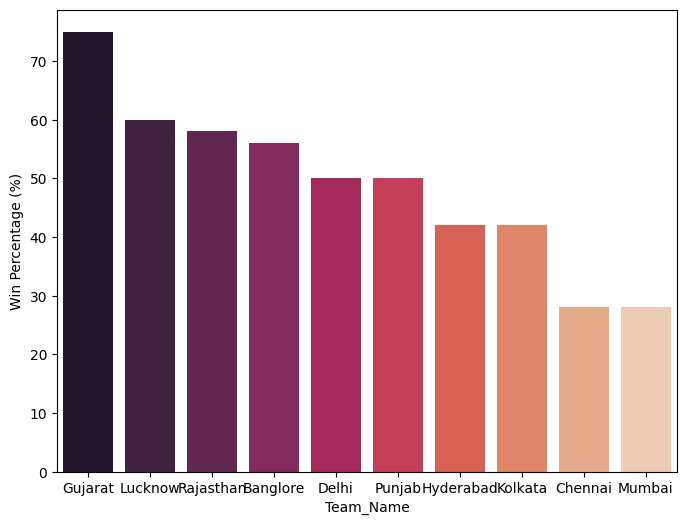

In [110]:
plt.figure(figsize=(8, 6))

sns.barplot(data=team_performance, x="Team_Name", y="Win Percentage (%)",palette='rocket')

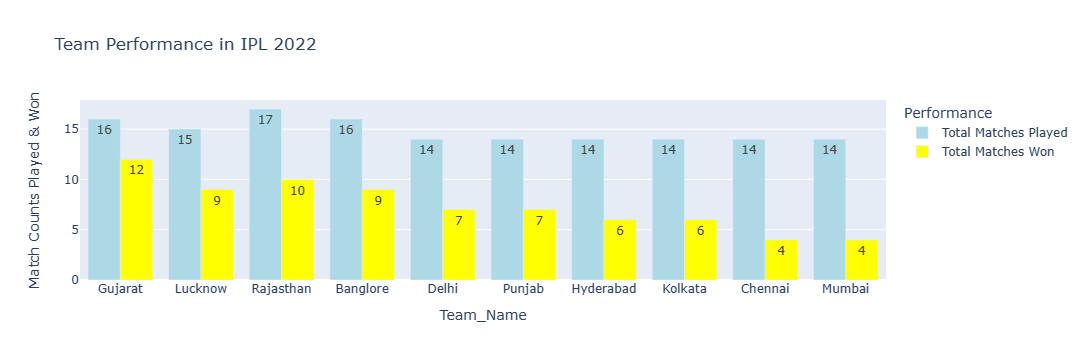

In [111]:
px.bar(
    team_performance, x=team_performance.index, y=['Total Matches Played', 'Total Matches Won'],
    text_auto=True, barmode='group', title='Team Performance in IPL 2022',
    labels={'index':'IPL Team'},color_discrete_map={'Total Matches Played': 'lightblue', 'Total Matches Won': 'yellow'}
).update_layout(
    legend_title_text='Performance',yaxis_title='Match Counts Played & Won')

**Observation** :-
- These DataFrame summarizes the performance of IPL teams in the 2022 season
- 'Gujarat' played 16 matches and won 12 of them, resulting in a win percentage of 75%.
- 'Lucknow' achieved a 60% win percentage, winning 9 out of 15 matches.
- 'Rajasthan' played the most matches (17) with a 58% win rate (10 wins)
- 'Banglore' & 'Delhi': 56% win rate (9 wins in 16 matches each).
- 'Punjab': 50% win rate (7 wins in 14 matches).
- 'Hyderabad' & 'Kolkata': 42% win rate (6 wins in 14 matches each).
- 'Chennai' & 'Mumbai': 28% win rate (4 wins in 14 matches each).

### VENUE SIGNIFICANCE

### Which Venue Hosted Mosted Number of Matches

In [120]:
# Count the number of matches hosted at each venue
df_venue=pd.DataFrame(df['venue'].value_counts())
df_venue

,count
venue,
"Wankhede Stadium, Mumbai",21
"Dr DY Patil Sports Academy, Mumbai",20
"Brabourne Stadium, Mumbai",16
"Maharashtra Cricket Association Stadium,Pune",13
"Eden Gardens, Kolkata",2
"Narendra Modi Stadium, Ahmedabad",2


C:\Users\naren\AppData\Local\Temp\ipykernel_16372\214382726.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='venue', ylabel='count'>

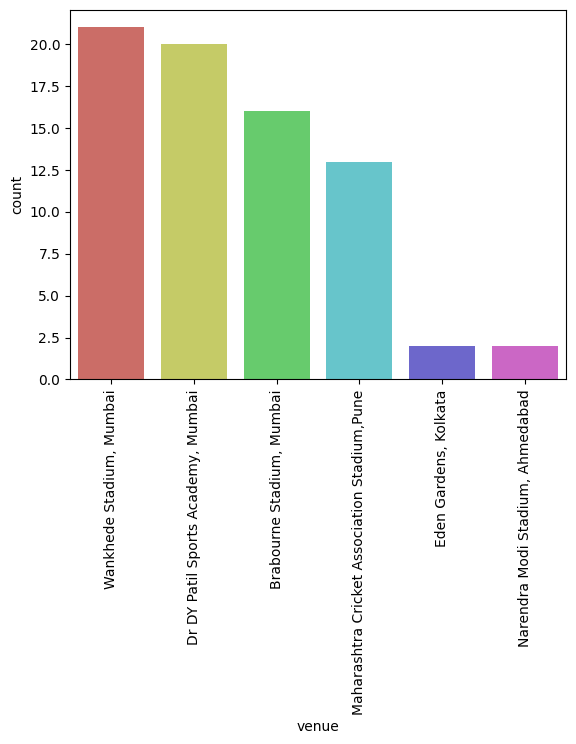

In [122]:
plt.xticks(rotation=90)
sns.barplot( x="venue", y="count" ,data=df_venue, palette="hls")

#### FIRST BATTING WINNING PERCENTAGE AT EACH VENUE

In [61]:
grouped_df = pd.DataFrame(df.groupby(['venue', 'won_by'])["won_by"].count()) #Groupby venue and won by
grouped_df

won_by
venue                                        won_by         
Brabourne Stadium, Mumbai                    Runs          8
                                             Wickets       8
Dr DY Patil Sports Academy, Mumbai           Runs         10
                                             Wickets      10
Eden Gardens, Kolkata                        Runs          1
                                             Wickets       1
Maharashtra Cricket Association Stadium,Pune Runs         10
                                             Wickets       3
Narendra Modi Stadium, Ahmedabad             Wickets       2
Wankhede Stadium, Mumbai                     Runs          8
                                             Wickets      13

**Observation** 
- Pune Stadium and Wankhede Stadium ,Mumbai Pitch playes role in favour of Batting First Team.
- Other Stadiums not plays that much role in choosing the batting or fielding
- Ahmedabad matches both wonn by fielding first but only two matches  played on that ground , not enough data to conclude that first batting is good.

### FIRST INNING AVERAGE SCORE AT EACH venue

In [62]:
grouped_df_fis = pd.DataFrame(df.groupby(['venue'])["first_ings_score"].mean()) #groupby venue and first inning score
grouped_df_fis

,first_ings_score
venue,
"Brabourne Stadium, Mumbai",177.250000
"Dr DY Patil Sports Academy, Mumbai",170.700000
"Eden Gardens, Kolkata",197.500000
"Maharashtra Cricket Association Stadium,Pune",171.461538
"Narendra Modi Stadium, Ahmedabad",143.500000
"Wankhede Stadium, Mumbai",166.761905


**Observation**
-Eden Garden is the High scoring Venue Where As Ahmedabad is a bowling pitch venue
-All 3 Mumbai veues having first ings avg score between 166 too 177 , we can say this three are balanced pitches.

C:\Users\naren\AppData\Local\Temp\ipykernel_16372\3150069917.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='venue', ylabel='first_ings_score'>

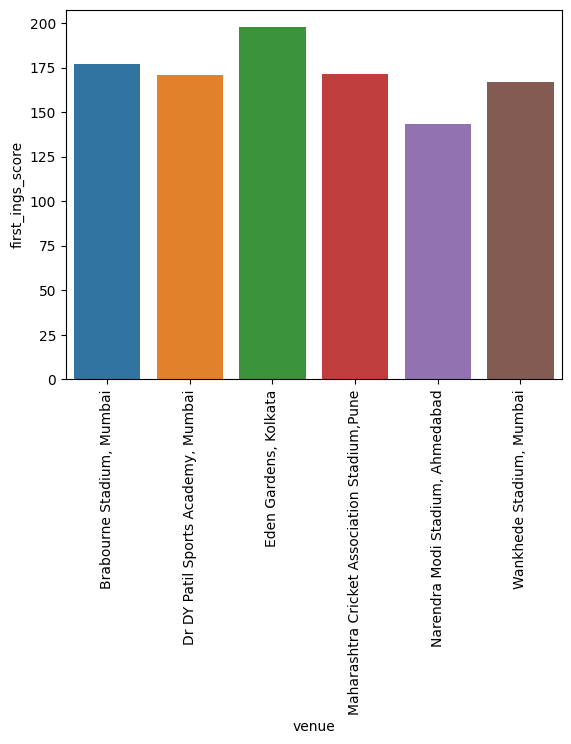

In [63]:
plt.xticks(rotation=90)
sns.barplot( x="venue", y="first_ings_score" ,data=grouped_df_fis, palette="tab10")

## PERFORMANCE OF PLAYERS

### Best Player of the Match

In [64]:
# Count the number of times each player received the "Player of the Match" award and display the top 10 players
df.groupby('player_of_the_match')['match_id'].count().sort_values(ascending=False)[:10]

player_of_the_match
Kuldeep Yadav       4
Jos Buttler         3
Umesh Yadav         2
Rahul Tripathi      2
Shubman Gill        2
K L Rahul           2
Quinton de Kock     2
Jasprit Bumrah      2
Hardik Pandya       2
Yuzvendra Chahal    2
Name: match_id, dtype: int64

**Observation** 
- Top 10 players who received the 'player_of_the_match' award:
- Kuldeep Yadav' received the award 4 times, making him the player with the most 'player_of_the_match' awards in the season.
- 'Jos Buttler' earning 3 awards, and 8 other players securing 2 awards each.

### Ploting insight in Bar Graph

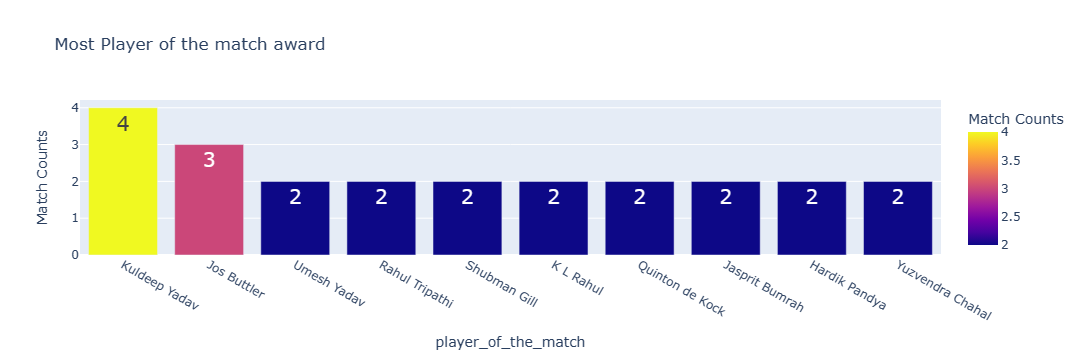

In [65]:
# visualize the players with the most "Player of the Match" awards

pom = df.groupby('player_of_the_match')['match_id'].count().sort_values(ascending=False)[:10]

px.bar(pom, y ='match_id', text='match_id',
       title='Most Player of the match award', color='match_id',
      labels={'match_id':'Match Counts'}).update_traces(textfont_size=20)

### Top Run Scorer in IPL 2022 taking count of high scores 

In [66]:
# Calculate the total high scores for each player and display the top 10 players
df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False)[:10]

top_scorer
Jos Buttler         651
Quinton de Kock     377
KL Rahul            351
Shubman Gill        288
Faf du Plessis      257
Liam Livingstone    239
David Warner        213
W. Saha             190
Ishan Kishan        180
Shikhar Dhawan      158
Name: highscore, dtype: int64

**Observation** 
- Top IPL 2022 run-scorers:
- 'Jos Buttler' leads with an impressive total high score of 651 runs.
- 'Quinton de Kock' follows with a cumulative high score of 377 runs.
- 'KL Rahul' with 351 runs, among others.

### Plotting insight in Bar graph

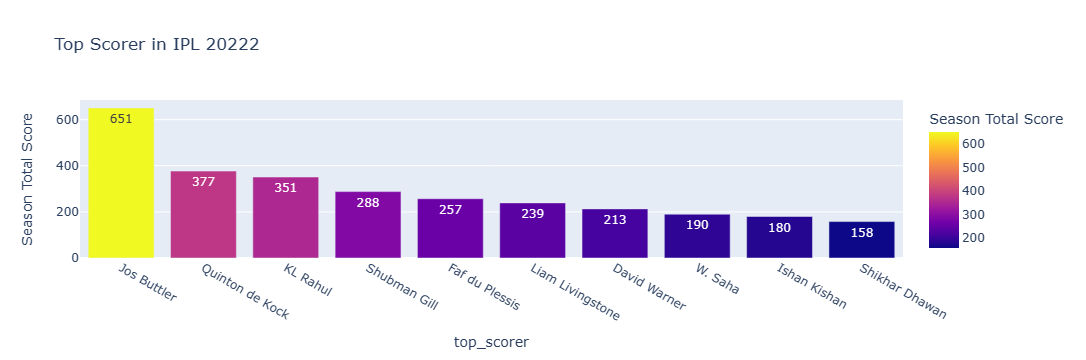

In [67]:
# Create a bar chart to visualize the top scorers in IPL 2022 based on their season total scores

score = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False)[:10]

px.bar(score, y='highscore',color='highscore',
       labels={'highscore':'Season Total Score'},
      title='Top Scorer in IPL 20222',text='highscore')

### TOP WICKET TAKER FROF THEIR HIGHEST WICKETS PER IN THE MATCGH

In [68]:
# Group the data by the 'best bowling' performance and count the number of times each bowler achieved it,
# then display the top 10 bowlers

bowler = df.groupby('best_bowling')['match_id'].count().sort_values(ascending=False)[:10]
bowler

best_bowling
Yuzvendra Chahal     5
Rashid Khan          4
Kuldeep Yadav        3
T Natarajan          3
Avesh Khan           3
Jasprit Bumrah       3
Josh Hazlewood       3
Kagiso Rabada        3
Wanindu Hasaranga    2
Umran Malik          2
Name: match_id, dtype: int64

In [69]:
bowler_wkts = df.groupby('best_bowling')['best_bowling_figure'].sum().sort_values(ascending=False)[:10]
bowler_wkts

best_bowling
Yuzvendra Chahal     17
Kuldeep Yadav        11
Rashid Khan          11
Jasprit Bumrah       11
Avesh Khan           10
Josh Hazlewood       10
Kagiso Rabada        10
Wanindu Hasaranga     9
Umran Malik           9
T Natarajan           8
Name: best_bowling_figure, dtype: int32

**Observations**:
- Yuzvendra Chahal was a standout performer with an impressive five "best bowler" awards with total 17 wickets.
- Rashid Khan wasn't far behind, clinching the "best bowler" title four times.
- However, several other bowlers also made notable contributions

### Visualize the top-performing bowlers in IPL 2022

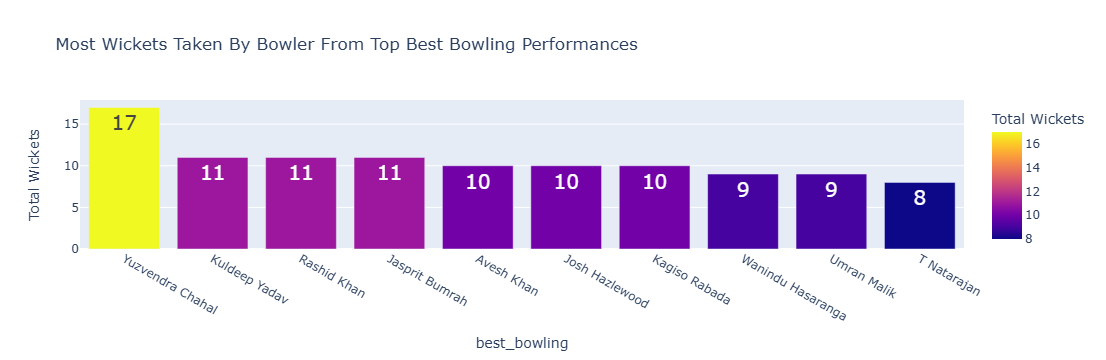

In [71]:
# visualize the players with the most "Player of the Match" awards
bowler_wkts = df.groupby('best_bowling')['best_bowling_figure'].sum().sort_values(ascending=False)[:10]
#pom = df.groupby('player_of_the_match')['match_id'].count().sort_values(ascending=False)[:10]

px.bar(bowler_wkts, y ='best_bowling_figure', text='best_bowling_figure',
       title='Most Wickets Taken By Bowler From Top Best Bowling Performances', color='best_bowling_figure',
      labels={'best_bowling_figure':'Total Wickets'}).update_traces(textfont_size=20)

# Conclusion

### Let’s summarize the important observations we made during Exploratory Data Analysis:

IPL 2022 showcased competitive cricket with diverse venues. Key takeaways:
- Gujarat dominated with 12 wins.
- Jos Buttler led in runs and player awards Yuzvender Chahal got high wickets from top performences.
- Mumbai venues hosted most matches.
- Gujarat and Hyderabad won the toss frequently and Gujrat converted his decisions in the win 75% .
- Teams evenly split wins between defending and chasing.
- Pune Stadium and Wankhede Stadium ,Mumbai Pitch playes role in favour of Batting First Team..
- From IPL 2022 We can conclude that Eden Garden is the High scoring Venue Where As Ahmedabad is a bowling pitch venue.
- In IPL 2022 overall toss win did not plays good much role in winning matches